<a href="https://colab.research.google.com/github/Rohan5076/machine-learning/blob/main/ML_17_Advanced_Ensemble_Techniques(Bagging)(Random_Forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Bagging 

Bagging, also known as Bootstrap aggregating, is an ensemble learning technique that helps to improve the performance and accuracy of machine learning algorithms. It is used to deal with bias-variance trade-offs and reduces the variance of a prediction model. Bagging avoids overfitting of data and is used for both regression and classification models, specifically for decision tree algorithms.

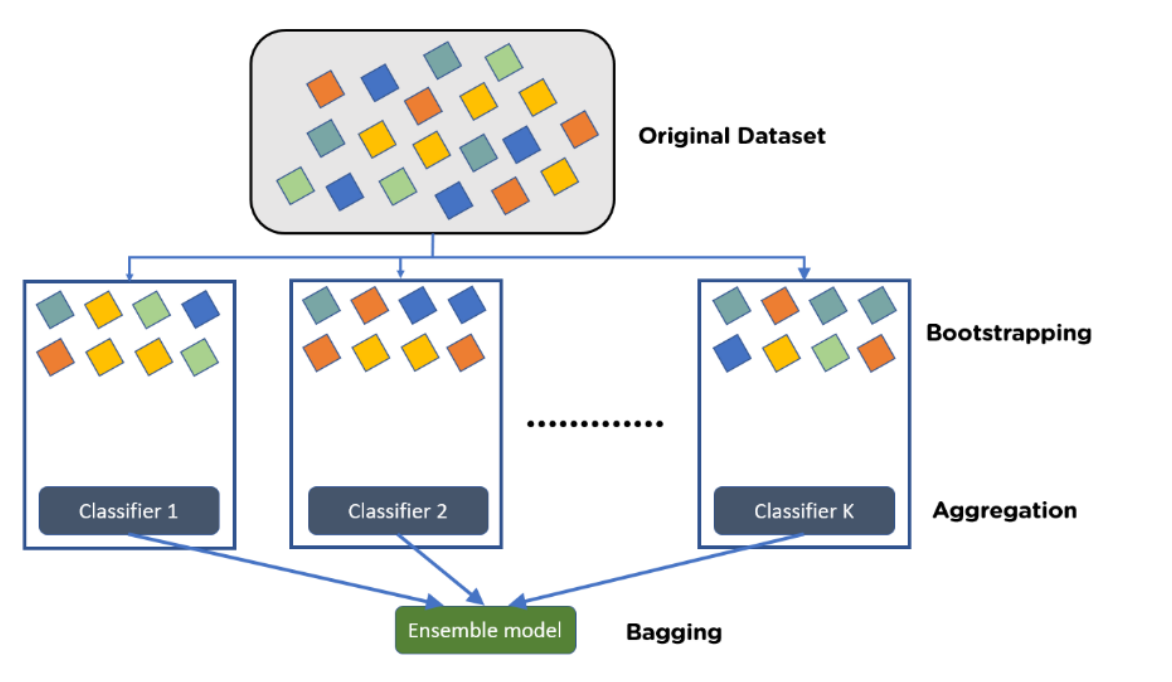

## What Is Bootstrapping?
Bootstrapping is the method of randomly creating samples of data out of a population with replacement to estimate a population parameter.

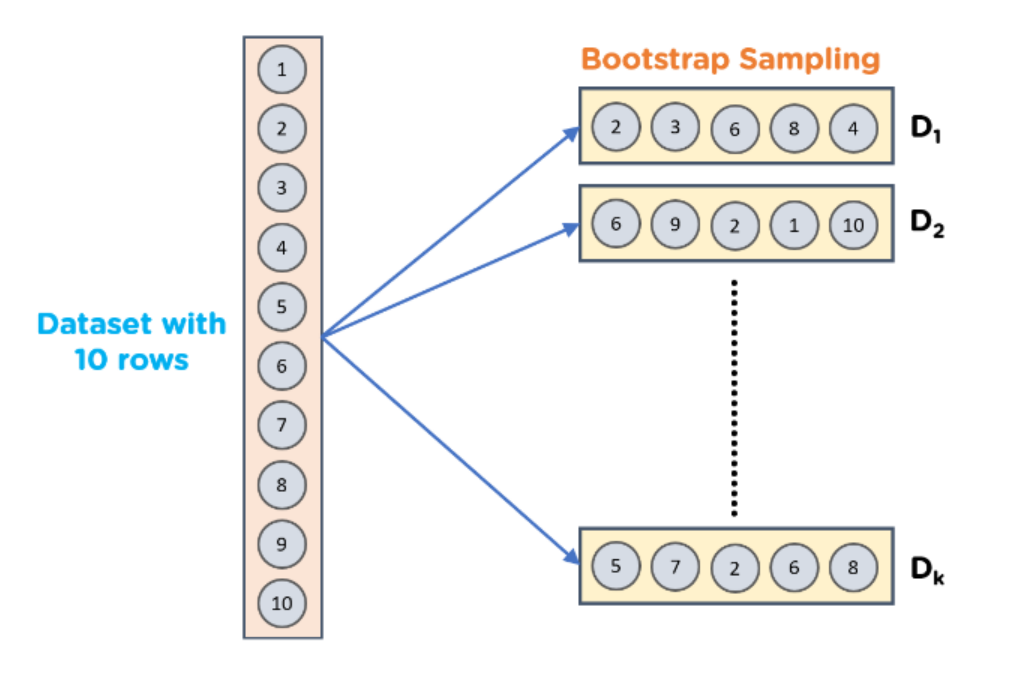

# Steps to Perform Bagging
1. Consider there are n observations and m features in the training set. You need to select a random sample from the training dataset without replacement
2. A subset of m features is chosen randomly to create a model using sample observations
3. The feature offering the best split out of the lot is used to split the nodes
4. The tree is grown, so you have the best root nodes
5. The above steps are repeated n times. It aggregates the output of individual decision trees to give the best prediction

## Advantages of Bagging in Machine Learning
1. Bagging minimizes the overfitting of data
2. It improves the model’s accuracy
3. It deals with higher dimensional data efficiently

# Random Forest Implementation

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

# Parameters 

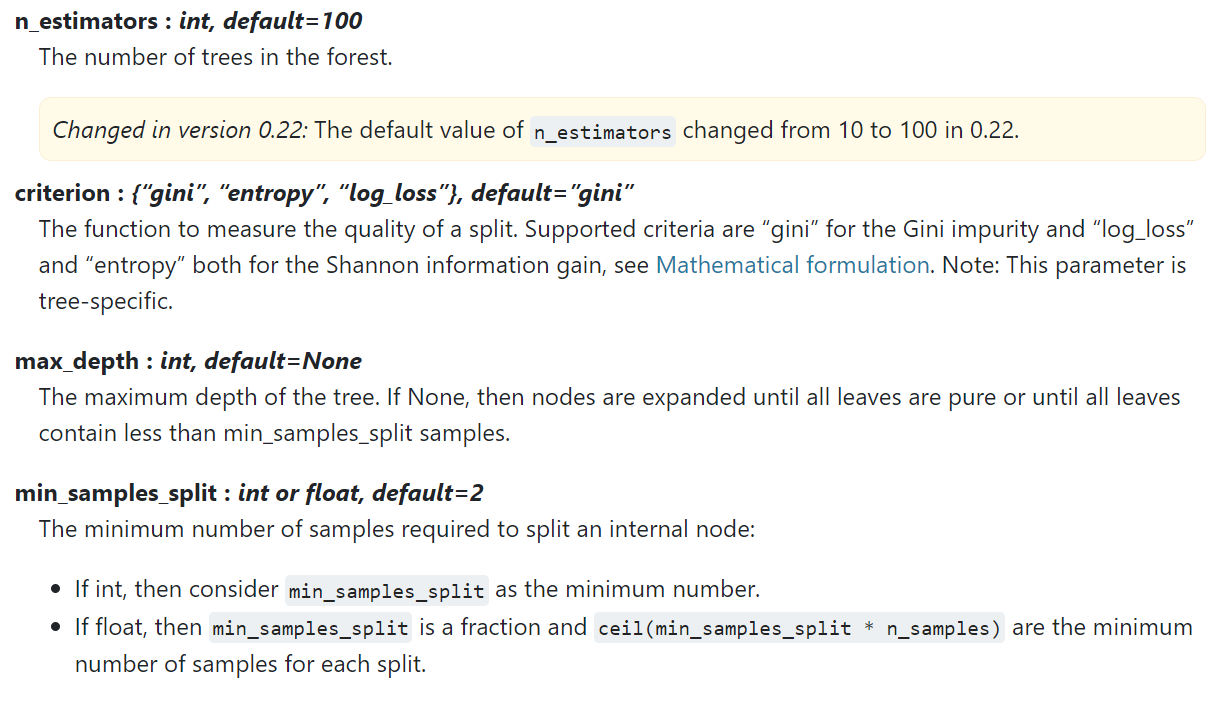

In [2]:
import six
import sys
sys.modules['sklearn.externals.six']  = six

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#loading the data set
df = pd.read_csv("/content/drive/MyDrive/All CSV files-20220711T101939Z-001/All CSV files/wheatseeds.csv")
df.head()

Area  Parameter  Compactness  Length of kernel  Width of kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Aymmetery coefficient  length kernel groove  class(1,2,3)  
0                  2.221                 5.220             1  
1                  1.018                 4.956             1  
2                  2.699                 4.825             1  
3                  2.259                 4.805             1  
4                  1.355                 5.175             1

In [6]:
# Creating X and y for training
X = df.drop('class(1,2,3)', axis = 1)
y = df['class(1,2,3)']

In [7]:
# 20 % training dataset is considered for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
#initializing sc object
sc = StandardScaler() 
# variables that needed to be transformed
var_transform = ['Area', 'Parameter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Aymmetery coefficient', 'length kernel groove']
X_train[var_transform] = sc.fit_transform(X_train[var_transform])   # standardizing training data
X_test[var_transform] = sc.transform(X_test[var_transform])            # standardizing test data
print(X_train.head())

         Area  Parameter  Compactness  Length of kernel  Width of kernel  \
150 -1.053856  -1.040832    -0.888808         -0.861746        -1.130186   
96   1.529271   1.549570     0.463557          1.608780         1.462880   
200 -0.863920  -0.878932    -0.409757         -0.962584        -0.731870   
68  -0.176698  -0.146527     0.086251         -0.160465        -0.293454   
156 -1.223071  -1.318376    -0.464869         -1.343017        -1.106127   

     Aymmetery coefficient  length kernel groove  
150               1.035482             -0.223421  
96               -0.126599              1.690317  
200               1.222849             -0.761981  
68               -1.488222             -0.237810  
156              -0.214533             -0.848315  


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))


[1]


In [10]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# load the data

X = X
Y =y

seed = 8
kfold = model_selection.KFold(n_splits = 3)

# initialize the base classifier
base_cls = DecisionTreeClassifier()

# no. of base classifier
num_trees = 500

# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
						n_estimators = num_trees,
						random_state = seed)

results = model_selection.cross_val_score(model, X, Y, cv = kfold)
print("accuracy :")
print(results)

accuracy :
[0.96706587 0.92792793 0.81981982]
